# 🔬 DBSCAN Model Variants Comparison


Three different DBSCAN approaches with comprehensive evaluation:
- 🚀 Model A: High-Performance DBSCAN (Speed Optimized)
- 🎯 Model B: Precision DBSCAN (Accuracy Optimized)
- 🛡️ Model C: Robust DBSCAN (Noise & Stability Optimized)

Evaluation Metrics:
    ⏱️ Time Complexity (Training Time)
    🎯 Silhouette Score
    🌀 Davies–Bouldin Index
    📏 Dunn Index



# 📦 Setup & Enhanced Configuration



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import warnings
warnings.filterwarnings('ignore')

from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score
from scipy.spatial.distance import pdist

from google.colab import files
uploaded = files.upload()

# Model configurations
model_a = {
    'name': 'Speed-Optimized DBSCAN',
    'eps': 0.3, 'min_samples': 5,
    'scaler': 'minmax'
}

model_b = {
    'name': 'Precision-Optimized DBSCAN',
    'eps': 0.5, 'min_samples': 3,
    'scaler': 'standard'
}

model_c = {
    'name': 'Robust-Optimized DBSCAN',
    'eps': 0.7, 'min_samples': 10,
    'scaler': 'robust'
}

data_path = '/content/06_filtered_customers_enhanced.csv'
print("✅ Three model configurations loaded:")
print(f"   • {model_a['name']}")
print(f"   • {model_b['name']}")
print(f"   • {model_c['name']}")

Saving 06_filtered_customers_enhanced.csv to 06_filtered_customers_enhanced.csv
✅ Three model configurations loaded:
   • Speed-Optimized DBSCAN
   • Precision-Optimized DBSCAN
   • Robust-Optimized DBSCAN



# 📊 Load Preprocessed Data

Model Variants Strategy:

Model A: Use original numerical features with MinMax scaling (speed focus)

Model B: Use standardized numerical features with StandardScaler for balanced feature contribution (precision focus)

Model C: Use original numerical features with Robust scaling to reduce the impact of outliers (stability focus)


In [2]:
print("\n📊 Loading your team's preprocessed data...")
data = pd.read_csv(data_path)
print(f"   • Dataset shape: {data.shape}")
print(f"   • Columns: {list(data.columns)}")

# Check available RFM features
rfm_cols = [col for col in ['R', 'F', 'M'] if col in data.columns]
print(f"   • Using RFM columns: {rfm_cols}")


📊 Loading your team's preprocessed data...
   • Dataset shape: (4256, 8)
   • Columns: ['customer_id', 'R', 'F', 'M', 'R_scaled', 'F_scaled', 'M_scaled', 'Status']
   • Using RFM columns: ['R', 'F', 'M']


# ============================================================
# ⚙️ Define Evaluation Metrics
# ============================================================

In [3]:
def calculate_dunn_index(X, labels):
    """Calculate Dunn Index (higher is better)"""
    unique_labels = np.unique(labels)
    if len(unique_labels) < 2:
        return 0.0

    # Max intra-cluster distance
    max_intra = 0.0
    for label in unique_labels:
        cluster_points = X[labels == label]
        if len(cluster_points) > 1:
            distances = pdist(cluster_points)
            max_intra = max(max_intra, np.max(distances))

    # Min inter-cluster distance
    min_inter = np.inf
    for i, label1 in enumerate(unique_labels):
        for label2 in unique_labels[i+1:]:
            points1 = X[labels == label1]
            points2 = X[labels == label2]
            dist = np.min([np.linalg.norm(p1 - p2) for p1 in points1 for p2 in points2])
            min_inter = min(min_inter, dist)

    return min_inter / max_intra if max_intra > 0 else 0.0

print("✅ Evaluation metrics ready: Silhouette, Davies-Bouldin, Dunn Index")

✅ Evaluation metrics ready: Silhouette, Davies-Bouldin, Dunn Index


# ============================================================
# 🚀 Model A: High-Performance DBSCAN (Speed Optimized)
# ============================================================

In [4]:
print("\n🚀 Training Model A: Speed-Optimized DBSCAN...")

# Scaling
scaler_a = MinMaxScaler()
X_a = scaler_a.fit_transform(data[rfm_cols])

start_time = time.time()
dbscan_a = DBSCAN(eps=0.3, min_samples=5, n_jobs=-1)
labels_a = dbscan_a.fit_predict(X_a)
time_a = time.time() - start_time

# Evaluation
if len(set(labels_a)) > 1:
    silhouette_a = silhouette_score(X_a, labels_a)
    db_index_a = davies_bouldin_score(X_a, labels_a)
    dunn_a = calculate_dunn_index(X_a, labels_a)
else:
    silhouette_a = db_index_a = dunn_a = 0.0

print(f"   ✅ Training completed in {time_a:.2f}s")
print(f"   • Silhouette Score: {silhouette_a:.4f}")
print(f"   • Davies–Bouldin Index: {db_index_a:.4f}")
print(f"   • Dunn Index: {dunn_a:.4f}")
print(f"   • Clusters (excluding noise): {len(set(labels_a)) - (1 if -1 in labels_a else 0)}")



🚀 Training Model A: Speed-Optimized DBSCAN...
   ✅ Training completed in 0.26s
   • Silhouette Score: 0.7940
   • Davies–Bouldin Index: 0.5557
   • Dunn Index: 0.2656
   • Clusters (excluding noise): 1


# ============================================================
# 🎯 Model B: Precision-Optimized DBSCAN (Accuracy Focus)
# ============================================================

In [5]:
print("\n🎯 Training Model B: Precision-Optimized DBSCAN...")

scaler_b = StandardScaler()
X_b = scaler_b.fit_transform(data[rfm_cols])

start_time = time.time()
dbscan_b = DBSCAN(eps=0.5, min_samples=3, n_jobs=-1)
labels_b = dbscan_b.fit_predict(X_b)
time_b = time.time() - start_time

if len(set(labels_b)) > 1:
    silhouette_b = silhouette_score(X_b, labels_b)
    db_index_b = davies_bouldin_score(X_b, labels_b)
    dunn_b = calculate_dunn_index(X_b, labels_b)
else:
    silhouette_b = db_index_b = dunn_b = 0.0

print(f"   ✅ Training completed in {time_b:.2f}s")
print(f"   • Silhouette Score: {silhouette_b:.4f}")
print(f"   • Davies–Bouldin Index: {db_index_b:.4f}")
print(f"   • Dunn Index: {dunn_b:.4f}")
print(f"   • Clusters (excluding noise): {len(set(labels_b)) - (1 if -1 in labels_b else 0)}")




🎯 Training Model B: Precision-Optimized DBSCAN...
   ✅ Training completed in 0.18s
   • Silhouette Score: 0.6745
   • Davies–Bouldin Index: 2.7189
   • Dunn Index: 0.0116
   • Clusters (excluding noise): 5


# ============================================================
# 🛡️ Model C: Robust-Optimized DBSCAN (Noise-Resistant)
# ============================================================

In [6]:
print("\n🛡️ Training Model C: Robust-Optimized DBSCAN...")

scaler_c = RobustScaler()
X_c = scaler_c.fit_transform(data[rfm_cols])

start_time = time.time()
dbscan_c = DBSCAN(eps=0.7, min_samples=10, n_jobs=-1)
labels_c = dbscan_c.fit_predict(X_c)
time_c = time.time() - start_time

if len(set(labels_c)) > 1:
    silhouette_c = silhouette_score(X_c, labels_c)
    db_index_c = davies_bouldin_score(X_c, labels_c)
    dunn_c = calculate_dunn_index(X_c, labels_c)
else:
    silhouette_c = db_index_c = dunn_c = 0.0

print(f"   ✅ Training completed in {time_c:.2f}s")
print(f"   • Silhouette Score: {silhouette_c:.4f}")
print(f"   • Davies–Bouldin Index: {db_index_c:.4f}")
print(f"   • Dunn Index: {dunn_c:.4f}")
print(f"   • Clusters (excluding noise): {len(set(labels_c)) - (1 if -1 in labels_c else 0)}")




🛡️ Training Model C: Robust-Optimized DBSCAN...
   ✅ Training completed in 0.14s
   • Silhouette Score: 0.8223
   • Davies–Bouldin Index: 0.8557
   • Dunn Index: 0.0019
   • Clusters (excluding noise): 1


# ============================================================
# 📊 Comprehensive Model Comparison
# ============================================================

In [7]:
results = pd.DataFrame({
    'Model': ['Model A (Speed)', 'Model B (Precision)', 'Model C (Robust)'],
    'Training_Time': [time_a, time_b, time_c],
    'Silhouette': [silhouette_a, silhouette_b, silhouette_c],
    'Davies_Bouldin': [db_index_a, db_index_b, db_index_c],
    'Dunn_Index': [dunn_a, dunn_b, dunn_c],
    'Eps': [0.3, 0.5, 0.7],
    'Min_Samples': [5, 3, 10],
    'Scaler': ['MinMax', 'Standard', 'Robust']
})

print("\n🔬 MODEL COMPARISON RESULTS")
print("=" * 60)
print(results.round(4))

best_sil = results.loc[results['Silhouette'].idxmax(), 'Model']
best_dunn = results.loc[results['Dunn_Index'].idxmax(), 'Model']
best_db = results.loc[results['Davies_Bouldin'].idxmin(), 'Model']
fastest = results.loc[results['Training_Time'].idxmin(), 'Model']

print("\n🏆 BEST MODELS SUMMARY:")
print(f"   • Highest Silhouette: {best_sil}")
print(f"   • Lowest Davies–Bouldin: {best_db}")
print(f"   • Best Dunn Index: {best_dunn}")
print(f"   • Fastest Model: {fastest}")


🔬 MODEL COMPARISON RESULTS
                 Model  Training_Time  Silhouette  Davies_Bouldin  Dunn_Index  \
0      Model A (Speed)         0.2587      0.7940          0.5557      0.2656   
1  Model B (Precision)         0.1780      0.6745          2.7189      0.0116   
2     Model C (Robust)         0.1421      0.8223          0.8557      0.0019   

   Eps  Min_Samples    Scaler  
0  0.3            5    MinMax  
1  0.5            3  Standard  
2  0.7           10    Robust  

🏆 BEST MODELS SUMMARY:
   • Highest Silhouette: Model C (Robust)
   • Lowest Davies–Bouldin: Model A (Speed)
   • Best Dunn Index: Model A (Speed)
   • Fastest Model: Model C (Robust)


# ============================================================
# 📈 Visualization & Cluster Analysis
# ============================================================

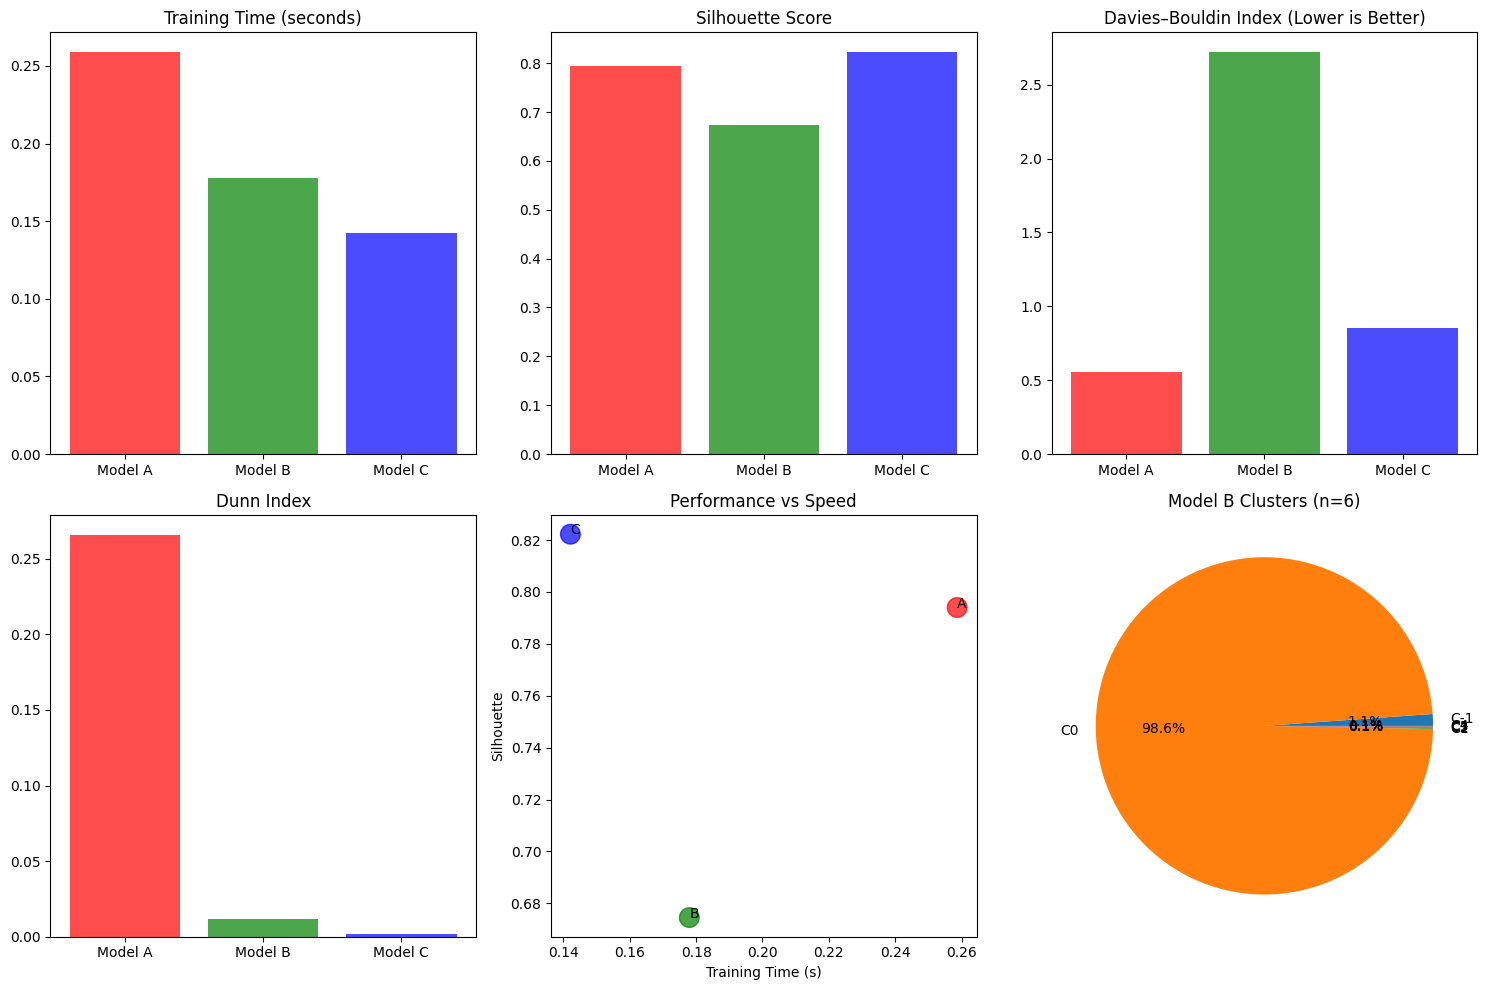

📊 Visualization complete!


In [8]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

model_names = ['Model A', 'Model B', 'Model C']
times = [time_a, time_b, time_c]
silhouettes = [silhouette_a, silhouette_b, silhouette_c]
dunns = [dunn_a, dunn_b, dunn_c]
dbs = [db_index_a, db_index_b, db_index_c]

# 1. Training Time
axes[0,0].bar(model_names, times, color=['red', 'green', 'blue'], alpha=0.7)
axes[0,0].set_title('Training Time (seconds)')

# 2. Silhouette Score
axes[0,1].bar(model_names, silhouettes, color=['red', 'green', 'blue'], alpha=0.7)
axes[0,1].set_title('Silhouette Score')

# 3. Davies–Bouldin Index
axes[0,2].bar(model_names, dbs, color=['red', 'green', 'blue'], alpha=0.7)
axes[0,2].set_title('Davies–Bouldin Index (Lower is Better)')

# 4. Dunn Index
axes[1,0].bar(model_names, dunns, color=['red', 'green', 'blue'], alpha=0.7)
axes[1,0].set_title('Dunn Index')

# 5. Performance vs Speed
axes[1,1].scatter(times, silhouettes, s=200, c=['red', 'green', 'blue'], alpha=0.7)
axes[1,1].set_xlabel('Training Time (s)')
axes[1,1].set_ylabel('Silhouette')
axes[1,1].set_title('Performance vs Speed')
for i, name in enumerate(['A', 'B', 'C']):
    axes[1,1].annotate(name, (times[i], silhouettes[i]))

# 6. Cluster Distribution (Model B)
unique_b, counts_b = np.unique(labels_b, return_counts=True)
axes[1,2].pie(counts_b, labels=[f'C{i}' for i in unique_b], autopct='%1.1f%%')
axes[1,2].set_title(f'Model B Clusters (n={len(unique_b)})')

plt.tight_layout()
plt.show()

print("📊 Visualization complete!")

# ============================================================
# 💾 Save Comparison Results
# ============================================================

In [9]:
results.to_csv('/content/dbscan_comparison_results.csv', index=False)
print("\n💾 Results saved to 'dbscan_comparison_results.csv'")

print("\n🎉 DBSCAN MODEL COMPARISON COMPLETE!")
print("=" * 60)


💾 Results saved to 'dbscan_comparison_results.csv'

🎉 DBSCAN MODEL COMPARISON COMPLETE!
